# Aplicando pandas


[Código de las clases](https://colab.research.google.com/drive/1kP-uz946kqxTy04bL69vYVNEL2bm454q#scrollTo=1p5rv3NxRHrN)

## Funciones matemáticas

* Vamos a aplicar operaciones matemáticas a un Data Frame nuevo.
* [London bike sharing dataset](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset).

In [59]:
import pandas as pd
import numpy as np

df_lmerged = pd.read_csv('datasets/london_merged.csv')

df_lmerged.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [60]:
#reconocer el tipo de datos que tenemos en el dataframe
df_lmerged.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [61]:
#a veces si el formato no es muy complejo, pandas puede identificarlo
df_lmerged['timestamp'] = pd.to_datetime(df_lmerged['timestamp'])
df_lmerged.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [62]:
# cuando las columnas ya tiene formato tiempo, se puede obtener la hora
df_lmerged['hour'] = df_lmerged['timestamp'].dt.hour  #Crea una columna solo con la hora
df_lmerged['hour']

0         0
1         1
2         2
3         3
4         4
         ..
17409    19
17410    20
17411    21
17412    22
17413    23
Name: hour, Length: 17414, dtype: int64

In [63]:
#seleccionamos todas menos timestamp
df=df_lmerged.iloc[:, 1:]
#ahora solo  tenemos variables numéricas

* Ahora apliquemos operaciones matemáticas entre la data.

In [64]:
# np.sin para calcular el seno 
#esta operaciones se llevan acabo en todos los valores de la columna
np.sin(df_lmerged['wind_speed']**3 + 10)

0       -0.193444
1        0.088369
2       -0.544021
3       -0.544021
4        0.952069
           ...   
17409    0.995740
17410   -0.159396
17411   -0.999995
17412    0.185789
17413    0.989226
Name: wind_speed, Length: 17414, dtype: float64

In [65]:
#diferencia de temperaturas
df['t1']-df['t2']

0        1.0
1        0.5
2        0.0
3        0.0
4        2.0
        ... 
17409    4.0
17410    4.0
17411    4.0
17412    4.0
17413    4.0
Length: 17414, dtype: float64

In [66]:
#diferencia de temperaturas, seleccionando los indices de 3 en 3 la columna t1
df['t1'].iloc[::3] - df['t2']   #En los vacíos le pone NaN

0        1.0
1        NaN
2        NaN
3        0.0
4        NaN
        ... 
17409    4.0
17410    NaN
17411    NaN
17412    4.0
17413    NaN
Length: 17414, dtype: float64

Existen métodos con las cuales se pueden operar elementos vacíos oque no existen NaN
```
+    add()
-    sub(), subtract()
*    mul(), multiply()
/    truediv(), div(), divide()
//   floordiv()
%    mod()
**   pow()
```

In [67]:
#.sub para hacer substracción

df_lmerged['t1'].iloc[::3].sub(df_lmerged['t2'], fill_value=1000)  

0           1.0
1         997.5
2         997.5
3           0.0
4        1000.0
          ...  
17409       4.0
17410     999.0
17411     998.5
17412       4.0
17413     999.0
Length: 17414, dtype: float64

* Vamos a hacer divisiones y producto punto.

In [68]:
df_lmerged['t1'] / df_lmerged['t2']  #División

0        1.500000
1        1.200000
2        1.000000
3        1.000000
4             inf
           ...   
17409    5.000000
17410    5.000000
17411    3.666667
17412    3.666667
17413    5.000000
Length: 17414, dtype: float64

In [69]:
df_lmerged['t1'] * df_lmerged['t2']  #Multiplicación

0        6.00
1        7.50
2        6.25
3        4.00
4        0.00
         ... 
17409    5.00
17410    5.00
17411    8.25
17412    8.25
17413    5.00
Length: 17414, dtype: float64

In [70]:
np.dot(df_lmerged['t1'], df_lmerged['t2'])   #dot product

3135730.277777778

## Funciones más complejas y lambdas

* Puedes usar el métodod `apply` para aplicar funciones (o 'algo' al Data Frame).
* `apply` viene por defecto con `axis=0` que significa que funciona para columnas.
* Si pones `axis=1` se aplica para filas. 

Además de apply, también se pueden usar las funciones applymap y map, dependiendo de la necesidad.

    * apply() se utiliza para aplicar una función a lo largo de un eje (columna o fila).
    * applymap() se usa para aplicar una función a todos los elementos del DataFrame
    * map() se usa para sustituir cada valor de una fila por otro valor.

Un ejemplo del uso de map() sería:
```df['wind_speed'].map('The wind speed is {}'.format)```

Primera gran diferencia: DEFINICIÓN

* map se define en Serie SOLAMENTE
* applymap está definido en DataFrames SOLAMENTE
* aply se define en AMBOS

Segunda gran diferencia: ARGUMENTO DE ENTRADA

* map acepta dicts Series, o invocable
* applymap y apply acepta solo llamadas

Tercera gran diferencia: COMPORTAMIENTO

* map es elementwise para Series
* applymap es elementwise para DataFrames
* apply también funciona con elementos, pero es adecuado para operaciones y agregaciones más * complejas. El comportamiento y el valor de retorno dependen de la función.

Cuarta diferencia principal (la más importante): CASO DE USO

* map está diseñado para mapear valores de un dominio a otro, por lo que está optimizado para el rendimiento (p. ej., df[‘A’].map({1:‘a’, 2:‘b’, 3:‘c’}))
* applymap es bueno para transformaciones de elementos en varias filas / columnas (p. ej., df[[‘A’, ‘B’, ‘C’]].applymap(str.strip))
* apply es para aplicar cualquier función que no se pueda vectorizar (p. ej., ```df[‘sentences’].apply(nltk.sent_tokenize)```)


In [71]:
df['wind_speed'].map('The wind speed is {}'.format)

0         The wind speed is 6.0
1         The wind speed is 5.0
2         The wind speed is 0.0
3         The wind speed is 0.0
4         The wind speed is 6.5
                  ...          
17409    The wind speed is 19.0
17410    The wind speed is 21.0
17411    The wind speed is 24.0
17412    The wind speed is 23.0
17413    The wind speed is 22.0
Name: wind_speed, Length: 17414, dtype: object

In [72]:
def fun_1(x):
  y = x**2 + 1
  return y

In [73]:
fun_1(df['hour'])

0          1
1          2
2          5
3         10
4         17
        ... 
17409    362
17410    401
17411    442
17412    485
17413    530
Name: hour, Length: 17414, dtype: int64

In [74]:
df['hour'].apply(fun_1)

0          1
1          2
2          5
3         10
4         17
        ... 
17409    362
17410    401
17411    442
17412    485
17413    530
Name: hour, Length: 17414, dtype: int64

In [75]:
# los valores definidos en a y b son los valores que toma si se omiten

def fun_2(x, a=1, b=0):
    y = x**2 + a*x + b
    return y

In [76]:
fun_2(df['hour'],10,-100)

0       -100
1        -89
2        -76
3        -61
4        -44
        ... 
17409    451
17410    500
17411    551
17412    604
17413    659
Name: hour, Length: 17414, dtype: int64

In [77]:
df['hour'].apply(fun_2, a=1, b=-100)

0       -100
1        -98
2        -94
3        -88
4        -80
        ... 
17409    280
17410    320
17411    362
17412    406
17413    452
Name: hour, Length: 17414, dtype: int64

In [78]:
df['t1'].apply(lambda x : ((x*9)/5)+32) #farenheit

0        37.4
1        37.4
2        36.5
3        35.6
4        35.6
         ... 
17409    41.0
17410    41.0
17411    41.9
17412    41.9
17413    41.0
Name: t1, Length: 17414, dtype: float64

In [79]:
df.apply(lambda x:x.mean())

cnt             1143.101642
t1                12.468091
t2                11.520836
hum               72.324954
wind_speed        15.913063
weather_code       2.722752
is_holiday         0.022051
is_weekend         0.285403
season             1.492075
hour              11.513265
dtype: float64

In [80]:
df_lmerged.apply(lambda x: x.std())

timestamp       211 days 05:11:06.233727904
cnt                             1085.108068
t1                                 5.571818
t2                                 6.615145
hum                               14.313186
wind_speed                          7.89457
weather_code                       2.341163
is_holiday                         0.146854
is_weekend                         0.451619
season                             1.118911
hour                               6.915893
dtype: object

In [81]:
df['t1'].head(4)

0    3.0
1    3.0
2    2.5
3    2.0
Name: t1, dtype: float64

In [82]:
df['t2'].head(4)

0    2.0
1    2.5
2    2.5
3    2.0
Name: t2, dtype: float64

In [83]:
#por fila
df.apply(lambda x: x['t1']-x['t2'], axis=1)

0        1.0
1        0.5
2        0.0
3        0.0
4        2.0
        ... 
17409    4.0
17410    4.0
17411    4.0
17412    4.0
17413    4.0
Length: 17414, dtype: float64

* `apply` funciona a lo largo de un ejece (fila o columna).
* `applymap` aplica funciones a TODOS los elementos del Data Frame. Solo funciona con Data Frames.
* `map` es para sustituir el valor de una fila por otro valor. Solo funciona en series.

## Múltiples índices
* Son útiles porque puedes aplicar operaciones matemáticas en varios niveles.
* También puedes tener mejor organizada la información.
* En este ejemplo usaremos los [datos de la población mundial](https://data.worldbank.org/indicator/SP.POP.TOTL) de la base de datos del Banco Mundial.

In [84]:
import pandas as pd
import numpy as np

In [85]:
df_pob = pd.read_csv('./datasets/poblacion.csv')
df_pob.head(5)

,Country,year,pop
0,Afghanistan,2015,34413603.0
1,Albania,2015,2880703.0
2,Algeria,2015,39728025.0
3,American Samoa,2015,55812.0
4,Andorra,2015,78011.0


In [86]:
#vemos que el año es una variable numérica, vamos a convertirla a una categórica
df_pob.dtypes

Country     object
year         int64
pop        float64
dtype: object

In [87]:
df_pob['year']=(df_pob['year'].apply(str)).astype('category')

In [88]:
df_pob.dtypes

Country      object
year       category
pop         float64
dtype: object

* Como te das cuenta, el índice por defecto que pandas te pone son los números a la izquierda.
* Hagamos que las columnas `Country` y `year` sean los índices.

In [89]:
df_pob['year'] = pd.Categorical(df_pob['year'].apply(str))
df_pob.dtypes

Country      object
year       category
pop         float64
dtype: object

* Primero aplicamos un filtro para seleccionar solo a Ecuador y Colombia.
* Después creamos un Data Frame de muestra solo con estos países.
* A este Data Frame le aplicamos los múltiples índices.

In [90]:
filtro = df_pob['Country'].isin(['Ecuador', 'Colombia']) #Filtro
df_sample = df_pob[filtro]  #Creamos este nuevo Data Frame

In [91]:
#Aplicando índices y ordenando
df_sample = df_sample.set_index(['Country', 'year']).sort_index() 
df_sample

pop
Country  year            
Colombia 2015  47520667.0
         2016  48171392.0
         2017  48901066.0
         2018  49648685.0
Ecuador  2015  16212020.0
         2016  16491115.0
         2017  16785361.0
         2018  17084357.0

In [92]:
df_sample.loc['Ecuador', :]

,pop
year,
2015,16212020.0
2016,16491115.0
2017,16785361.0
2018,17084357.0


In [93]:
df_sample.loc['Ecuador', :].loc[2018,:]

KeyError: 2018

In [ ]:
#Pero es más fácil buscar los datos así
df_sample.xs(['Ecuador', '2018'])

pop    17084357.0
Name: (Ecuador, 2018), dtype: float64

In [ ]:
#Podemos hacer la búsquena a un nivel específico
df_sample.xs('2018', level='year')

,pop
Country,
Colombia,49648685.0
Ecuador,17084357.0


In [ ]:
df_pob.dtypes

Country      object
year       category
pop         float64
dtype: object

In [ ]:
#Aplicamos a todo el data set
df_countries = df_pob.set_index(['Country', 'year']).sort_index(ascending=[True, True])
#df_countries = df_pob.set_index(['Country', 'year'])
df_countries

pop
Country     year            
Afghanistan 2015  34413603.0
            2016  35383128.0
            2017  36296400.0
            2018  37172386.0
Albania     2015   2880703.0
...                      ...
Zambia      2018  17351822.0
Zimbabwe    2015  13814629.0
            2016  14030390.0
            2017  14236745.0
            2018  14439018.0

[1040 rows x 1 columns]

In [ ]:
midx = pd.MultiIndex.from_product([['A0','A1','A3'], ['B0','B1','B2','B3']])
columns = ['foo', 'bar']

dfmi = pd.DataFrame(np.arange(24).reshape((len(midx), len(columns))), index=midx, columns=columns)

In [ ]:
dfmi

foo  bar
A0 B0    0    1
   B1    2    3
   B2    4    5
   B3    6    7
A1 B0    8    9
   B1   10   11
   B2   12   13
   B3   14   15
A3 B0   16   17
   B1   18   19
   B2   20   21
   B3   22   23

In [ ]:
dfmi.loc[(slice(None), slice('B0', 'B1')), :]

foo  bar
A0 B0    0    1
   B1    2    3
A1 B0    8    9
   B1   10   11

In [ ]:
idx = pd.IndexSlice

dfmi.loc[idx['A0':'A1', 'B0':'B1'], :]

foo  bar
A0 B0    0    1
   B1    2    3
A1 B0    8    9
   B1   10   11

In [ ]:
df_countries.loc[(slice('Aruba','Austria'), slice('2015','2018')), :]

pop
Country   year            
Aruba     2015    104341.0
          2016    104872.0
          2017    105366.0
          2018    105845.0
Australia 2015  23815995.0
          2016  24190907.0
          2017  24601860.0
          2018  24992369.0
Austria   2015   8642699.0
          2016   8736668.0
          2017   8797566.0
          2018   8847037.0

In [ ]:
#Vamos a traer un pedazo
df_countries.loc[pd.IndexSlice['Aruba':'Austria','2016':'2018'], :]

pop
Country   year            
Aruba     2016    104872.0
          2017    105366.0
          2018    105845.0
Australia 2016  24190907.0
          2017  24601860.0
          2018  24992369.0
Austria   2016   8736668.0
          2017   8797566.0
          2018   8847037.0

In [ ]:
df_countries.index.get_level_values(1)

CategoricalIndex([2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018, 2015, 2016,
                  ...
                  2017, 2018, 2015, 2016, 2017, 2018, 2015, 2016, 2017, 2018],
                 categories=[2015, 2016, 2017, 2018], ordered=False, dtype='category', name='year', length=1040)

In [ ]:
#Traigamos la población de Uruguay en 2018
df_countries['pop']['Mexico']['2017']

124777324.0

In [ ]:
#Obtengamos la suma de la población de todos los países por  año
df_countries.sum(level='year')

c:\Users\Lucy\Documents\janet\Platzi\Manipulación de Pandas\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


,pop
year,
2015,6.567915e+10
2016,6.648793e+10
2017,6.729418e+10
2018,6.808789e+10


Como vemos la función sum para series y dataframes, está desactualizada, en su lugar deberíamos usar Groupby. mas adelante se verá

Podemos cambiatr filas a columnas con `unstack`

In [94]:
df_countries.unstack('year')

pop                                    
year                         2015        2016        2017        2018
Country                                                              
Afghanistan            34413603.0  35383128.0  36296400.0  37172386.0
Albania                 2880703.0   2876101.0   2873457.0   2866376.0
Algeria                39728025.0  40551404.0  41389198.0  42228429.0
American Samoa            55812.0     55741.0     55620.0     55465.0
Andorra                   78011.0     77297.0     77001.0     77006.0
...                           ...         ...         ...         ...
Virgin Islands (U.S.)    107710.0    107510.0    107268.0    106977.0
West Bank and Gaza      4270092.0   4367088.0   4454805.0   4569087.0
Yemen, Rep.            26497889.0  27168210.0  27834821.0  28498687.0
Zambia                 15879361.0  16363507.0  16853688.0  17351822.0
Zimbabwe               13814629.0  14030390.0  14236745.0  14439018.0

[260 rows x 4 columns]

In [95]:

df_countries.unstack('Country')

pop                                                 \
Country Afghanistan    Albania     Algeria American Samoa  Andorra   
year                                                                 
2015     34413603.0  2880703.0  39728025.0        55812.0  78011.0   
2016     35383128.0  2876101.0  40551404.0        55741.0  77297.0   
2017     36296400.0  2873457.0  41389198.0        55620.0  77001.0   
2018     37172386.0  2866376.0  42228429.0        55465.0  77006.0   

                                                                             \
Country      Angola Antigua and Barbuda   Arab World   Argentina    Armenia   
year                                                                          
2015     27884381.0             93566.0  396028278.0  43131966.0  2925553.0   
2016     28842484.0             94527.0  404024433.0  43590368.0  2936146.0   
2017     29816748.0             95426.0  411898965.0  44044811.0  2944809.0   
2018     30809762.0             96286.0  419790588.0  44494502.0  2951776.0   

         ...                                                             \
Country  ...    Uruguay  Uzbekistan   Vanuatu Venezuela, RB     Vietnam   
year     ...                                                              
2015     ...  3412009.0  31298900.0  271130.0    30081829.0  92677076.0   
2016     ...  3424132.0  31847900.0  278330.0    29846179.0  93638724.0   
2017     ...  3436646.0  32388600.0  285510.0    29390409.0  94596642.0   
2018     ...  3449299.0  32955400.0  292680.0    28870195.0  95540395.0   

                                                                          \
Country Virgin Islands (U.S.) West Bank and Gaza Yemen, Rep.      Zambia   
year                                                                       
2015                 107710.0          4270092.0  26497889.0  15879361.0   
2016                 107510.0          4367088.0  27168210.0  16363507.0   
2017                 107268.0          4454805.0  27834821.0  16853688.0   
2018                 106977.0          4569087.0  28498687.0  17351822.0   

                     
Country    Zimbabwe  
year                 
2015     13814629.0  
2016     14030390.0  
2017     14236745.0  
2018     14439018.0  

[4 rows x 260 columns]

## Cómo trabajar con variables tipo texto en Pandas
Pandas cuenta con una gran funcionalidad a la hora de interactuar con texto, es super versatil si estas interesado en crear modelos de análisis de lenguaje natural.

Comencemos cargando nuestra librería y creando un diccionario con nombres de personas

Usemos los datos del diccionario para crear nuestro DataFrame. Nuestro DataFrame contiene una columna tipo texto, con variedades de caracteres especiales, números, mayúsculas e inclusive variables nulas.

In [96]:
import pandas as pd

data = {'names':['Sara Moreno 34',
                 'jUAn GOMez 23',
                 'CArlos mArtinez 89',
                 'Alfredo VelaZques 3',
                 'luis Mora 56',
                 '@freddier #platzi 10',pd.NA]}

df = pd.DataFrame(data)
df

,names
0,Sara Moreno 34
1,jUAn GOMez 23
2,CArlos mArtinez 89
3,Alfredo VelaZques 3
4,luis Mora 56
5,@freddier #platzi 10
6,<NA>


Para usar las funciones asociadas a texto usamos str en nuestro DataFrame, por ejemplo, si se quiere colocar el texto en minúscula, basta con escribir:

In [ ]:
#para hacer todo minúsculas
df['names'].str.lower()
#Para mayúsculas usar upper() y para la primera mayúscyala usar capitalize()

0          sara moreno 34
1           juan gomez 23
2      carlos martinez 89
3     alfredo velazques 3
4            luis mora 56
5    @freddier #platzi 10
6                    <NA>
Name: names, dtype: object

Para dividir el texto por espacios usamos split y definimos el carácter por
el que queremos dividir, en este caso, un espacio vacío ' ' o '#':

In [97]:
#Para hacer una lista con un split
df['names'].str.split(' ') 

0          [Sara, Moreno, 34]
1           [jUAn, GOMez, 23]
2      [CArlos, mArtinez, 89]
3     [Alfredo, VelaZques, 3]
4            [luis, Mora, 56]
5    [@freddier, #platzi, 10]
6                        <NA>
Name: names, dtype: object

* Puedes aplicar funciones de búsqueda, conteo `len`, reemplazo `replace` y expresiones regulares.
    * `df['names'].str.findall('ara')`
    * `df['names'].str.contains('or')`
* podemos contar el número de ocurrencias de un caracter en específico,
por ejemplo, cuántas veces aparece la letra 'a':
    * `df['names'].str.lower().str.count('a')`

In [98]:
df['names'].str.lower().str.count('a')

0       2
1       1
2       2
3       2
4       1
5       1
6    <NA>
Name: names, dtype: object

Existen comandos más avanzados usando Regex, por ejemplo, si quiero extraer los caracteres numéricos:

In [ ]:
#Para extraer los números aplicamos
df['names'].str.extract('([0-9]+)', expand=False)

0     34
1     23
2     89
3      3
4     56
5     10
6    NaN
Name: names, dtype: object

O, por ejemplo, si quiero extraer las menciones '@xxxx' del texto:

In [99]:
#Para extraer todo lo que tenga un hash (#)
df['names'].str.replace('#[^\s]+','aquì habia algo')

c:\Users\Lucy\Documents\janet\Platzi\Manipulación de Pandas\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0                  Sara Moreno 34
1                   jUAn GOMez 23
2              CArlos mArtinez 89
3             Alfredo VelaZques 3
4                    luis Mora 56
5    @freddier aquì habia algo 10
6                            <NA>
Name: names, dtype: object

* Recuerda que lo importante es leer la documentación y, sobre todo, **saber googlear**. Nunca te aprendas las cosas de memoria.

## Concatenación de Data Frames: concat y append
* Cuando los datos están disponibles en porciones las funciones `concat` y `append` son muy útiles para el análisis.
* Puedes usar ambas funciones para concatenar.
* Primero veremos un ejemplo concatenando matrices con Numpy.

In [102]:
import pandas as pd
import numpy as np 

In [110]:
np.set_printoptions(precision=2)

In [119]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
help(pd.concat)


In [107]:
x1 = np.random.rand(2, 5)*100 #Una matriz random 2x5 
x2 = np.random.rand(2, 5)*-10 #Una matriz random 2x5 

In [111]:
x1


array([[15.98,  4.89, 89.77, 60.97,  9.54],
       [ 9.86, 29.79, 48.1 , 85.52, 58.46]])

In [112]:
#Ahora las concatenamos como una matrix 4x5
np.concatenate([x1, x2])

array([[15.98,  4.89, 89.77, 60.97,  9.54],
       [ 9.86, 29.79, 48.1 , 85.52, 58.46],
       [-0.46, -7.95, -2.78, -5.61, -8.45],
       [-4.25, -3.2 , -4.44, -7.1 , -2.11]])

In [114]:
np.concatenate([x1, x2], axis=1)

array([[15.98,  4.89, 89.77, 60.97,  9.54, -0.46, -7.95, -2.78, -5.61,
        -8.45],
       [ 9.86, 29.79, 48.1 , 85.52, 58.46, -4.25, -3.2 , -4.44, -7.1 ,
        -2.11]])

In [115]:
np.random.rand(5)

array([0.38, 0.74, 0.17, 0.95, 0.97])

### Concatenando series en Pandas
* Ahora concatenaremos series.

In [124]:
s1 = pd.Series(x1[0], index=['a','b','c','d','e'])
s2 = pd.Series(x2[0], index=['c', 'd', 'e', 'f', 'g'])

In [ ]:
pd.concat([s1, s2], axis=1)

,0,1
a,8.460334,NaN
b,3.571430,NaN
c,7.089929,-0.134978
d,0.499172,-0.051068
e,1.839926,-5.115224
f,NaN,-6.497086
g,NaN,-5.616280


In [125]:
pd.concat([s1,s2])

a   15.98
b    4.89
c   89.77
d   60.97
e    9.54
c   -0.46
d   -7.95
e   -2.78
f   -5.61
g   -8.45
dtype: float64

In [ ]:
#Puedes resetear los índices que pusiste así:
s1.reset_index(drop=True) #Si no pones `drop=True` se te crea una columna de los indices

0    8.460334
1    3.571430
2    7.089929
3    0.499172
4    1.839926
dtype: float64

In [ ]:
pd.concat([s1.reset_index(drop=True), s2.reset_index(drop=True)], axis=1)

,0,1
0,8.460334,-0.134978
1,3.571430,-0.051068
2,7.089929,-5.115224
3,0.499172,-6.497086
4,1.839926,-5.616280


### Concatenando Data Frames
* Usas `concat` o `append`, según te sientas más cómodo.

In [127]:
df1 = pd.DataFrame(np.random.rand(3, 2)*10, columns=['a', 'b'])
df2 = pd.DataFrame(np.random.rand(3, 2)*-10, columns=['a', 'b'], index=[2, 3, 4])

In [128]:
df1

,a,b
0,5.60,7.47
1,7.72,8.31
2,5.29,1.79


In [129]:
df2

,a,b
2,-8.47,-8.75
3,-0.41,-8.58
4,-1.79,-2.19


In [126]:
#Concatenando con `concat`
pd.concat([df1, df2])

,a,b
0,3.34,3.15
1,6.91,1.53
2,5.04,4.96
2,-0.38,-2.46
3,-7.73,-0.64
4,-8.65,-4.06


In [130]:
pd.concat([df1, df2], axis=1)

,a,b,a,b
0,5.60,7.47,NaN,NaN
1,7.72,8.31,NaN,NaN
2,5.29,1.79,-8.47,-8.75
3,NaN,NaN,-0.41,-8.58
4,NaN,NaN,-1.79,-2.19


In [133]:
#Si queremos solo la columna que contiene datos (sin ningún NaN)
pd.concat([df1, df2], axis=1, join='inner')

,a,b,a,b
2,5.29,1.79,-8.47,-8.75


In [ ]:
pd.concat([
           df1.reset_index(drop=True),
           df2.reset_index(drop=True)
           ], axis=1)

,a,b,a,b
0,7.715385,0.497343,-3.876455,-9.999246
1,2.397477,7.184309,-5.811722,-4.964752
2,6.094991,6.893195,-5.886120,-1.748309


In [134]:
#Puedes usar append y obtener los mismos resultados
df1.append(df2)  #Aquí puedes agregar múltiples Data Frames

,a,b
0,5.60,7.47
1,7.72,8.31
2,5.29,1.79
2,-8.47,-8.75
3,-0.41,-8.58
4,-1.79,-2.19


In [ ]:
#Si quieres hacerlo en sentido de las filas, transpones las matrices
df1.T.append(df2.T).T

,a,b,a,b
0,7.715385,0.497343,NaN,NaN
1,2.397477,7.184309,NaN,NaN
2,6.094991,6.893195,-3.876455,-9.999246
3,NaN,NaN,-5.811722,-4.964752
4,NaN,NaN,-5.886120,-1.748309


In [136]:
x1.append(x2)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

## Merge de Data Frames
* Un _merge_ de Data Frames es un tipo de concatenación que se da cuando dos Data Frames tienen una columna en común.
* Es útil cuando tienes fuentes de datos diferentes y quieres unificarlas a través de un parámetro que se comparte entre ellas. 

In [140]:
import pandas as pd

df_left = pd.DataFrame(
                       {'X': ['x0', 'x1', 'x2', 'x3'],
                        'W': ['w0', 'w1', 'w2', 'w3'], 
                        'Y': ['y0', 'y1', 'y2', 'y3'] },
                       index=[0,1,2,3])

df_right = pd.DataFrame(
    {'Z':['z2','z3','z4','z5'],
     'A':['a2','a3','a4','a5'],
     'Y':['y2','y3','y4','y5']},
    index = [2,3,4,5])

In [141]:
df_left

,X,W,Y
0,x0,w0,y0
1,x1,w1,y1
2,x2,w2,y2
3,x3,w3,y3


In [ ]:
df_right

,Z,A,Y
2,z2,a2,y2
3,z3,a3,y3
4,z4,a4,y4
5,z5,a5,y5


In [142]:
pd.merge(df_left, df_right)

,X,W,Y,Z,A
0,x2,w2,y2,z2,a2
1,x3,w3,y3,z3,a3


La anterior línea viene con los siguientes comandos por defecto:

In [143]:
pd.merge(df_left, df_right, how='inner', on='Y')

,X,W,Y,Z,A
0,x2,w2,y2,z2,a2
1,x3,w3,y3,z3,a3


In [144]:
df_left = pd.DataFrame(
    {'X':['x0','x1','x2','x3'],
    'W':['w0','w1','w2','w3'],
    'Y':['y0','y1','y2','y3'],
    'Mix':['y2','y3','a2','a3']},
    index = ['y2','y3','a2','a3'])

df_right = pd.DataFrame(
    {'Z':['z2','z3','z4','z5'],
     'A':['a2','a3','a4','a5'],
     'Y':['y2','y3','y4','y5']},
    index = [2,3,4,5])

También puedes hacer _merge_ de las columnas que desees, por ejemplo tomando `Mix` (por la izquierda) y la columna `Y` (por la derecha), encontrará el cruce de datos. como tenemos  `Y` en ambas columnas, aparecerá 2 veces renombrado.

In [146]:
pd.merge(df_left, df_right, how='inner', left_on='Mix', right_on='Y')

,X,W,Y_x,Mix,Z,A,Y_y
0,x0,w0,y0,y2,z2,a2,y2
1,x1,w1,y1,y3,z3,a3,y3


Hagamos lo mismo, solo que ahora con la columna `A`.

In [147]:
pd.merge(df_left, df_right, how='inner', left_on='Mix', right_on='A')

,X,W,Y_x,Mix,Z,A,Y_y
0,x2,w2,y2,a2,z2,a2,y2
1,x3,w3,y3,a3,z3,a3,y3


Como te das cuenta, se crean las columnas `Y_x` (por la izquierda) y `Y_y` (por la derecha). Esto es para diferenciar la una de la otra, ya que `Y` existe para ambos Data Frames.

Pero también les puedes dar nombres a estos sufijos.

In [148]:
pd.merge(df_left, df_right, how='inner', left_on='Mix', right_on='A', suffixes=['_left', '_right'])

,X,W,Y_left,Mix,Z,A,Y_right
0,x2,w2,y2,a2,z2,a2,y2
1,x3,w3,y3,a3,z3,a3,y3


### ¿De qué formas podemos hacer _merge_ en Data Frames?
![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

Veamos ejemplos de cada uno de ellos. Recuerda que por defecto el _merge_ viene con `how'inner'` y ya lo vimos antes.

In [ ]:
#how=inner, trae lo que tienen en común las columnas
pd.merge(df_left, df_right, how='inner', on='Y')

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3


In [ ]:
#how='left'
pd.merge(df_left, df_right, how='left', on='Y')

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3


In [ ]:
pd.merge(df_left, df_right, how='right', on='Y')

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3
2,NaN,NaN,y4,NaN,z4,a4
3,NaN,NaN,y5,NaN,z5,a5


Puede ser incluso una lista de columnas si es que tenemos mas de una con el mismo nombre

In [150]:
pd.merge(df_left, df_right, how='outer', on=['Y'])

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3
4,NaN,NaN,y4,NaN,z4,a4
5,NaN,NaN,y5,NaN,z5,a5


In [ ]:
pd.merge(df_left, df_right, how='outer', on='Y')

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3
4,NaN,NaN,y4,NaN,z4,a4
5,NaN,NaN,y5,NaN,z5,a5


## ¿Cómo lidiar con datos faltantes en tus Data Frames?

* Es común que en en Data Frame falten datos.
* Recuerda que el NaN es un objeto con propiedades matemáticas. Lo puedes invocar con Numpy.
* Además, las versiones modernas de Pandas ya vienen con el objeto NA.
* Veamos un ejemplo con un data frame. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3), columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


Agreguemos algunas variables no definidas.

In [ ]:
df['d'] = np.nan
df['e'] = np.arange(15, 20)
df.loc[5,:] = pd.NA
df.loc[4,'a'] = pd.NA
df.loc[0,'d'] = 1
df.loc[5,'d'] = 10
df

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,NaN,16.0
2,6.0,7.0,8.0,NaN,17.0
3,9.0,10.0,11.0,NaN,18.0
4,<NA>,13.0,14.0,NaN,19.0
5,<NA>,<NA>,<NA>,10,<NA>


In [ ]:
Para reconocer un objeto nulo puedes usar `isnull()` o `isna()`.

SyntaxError: invalid syntax (1042674722.py, line 1)

In [ ]:
df.isnull()

,a,b,c,d,e
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,True,False,False,True,False
5,True,True,True,False,True


Para saber cuántos objetos nulos tienes solo hay que sumar.

In [ ]:
df.isna().sum()  #Por columnas

a    2
b    1
c    1
d    4
e    1
dtype: int64

In [ ]:
df.isna().sum(axis=1)  #Por filas

0    0
1    1
2    1
3    1
4    2
5    4
dtype: int64

O todos los elementos **no nulos** de nuestro Data Frame.

In [ ]:
df.size - df.isna().sum().sum()

21

Ahora filtremos por variables no nulas de la columna a.

In [ ]:
df[df['a'].notnull()]


,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,NaN,16.0
2,6.0,7.0,8.0,NaN,17.0
3,9.0,10.0,11.0,NaN,18.0


Por otra parte, `dropna()` te permite eliminar filas con registros faltantes.

In [ ]:
df.dropna()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0


In [ ]:
df['c'].dropna()

0     2.0
1     5.0
2     8.0
3    11.0
4    14.0
Name: c, dtype: object

### Entonces, ¿cómo podemos lidiar con registros faltantes?

Puedes emplear el cualquiera de estos métodos. Elige el que mejor se ajuste.

* Llenar con ceros (0) o cualquier otro valor `.fillna(valor)`.
* Llenar con el valor siguiente.
* Llenar con el valor anterior.
* Llenar con la media de los datos existentes por columna o fila.
* Llenar interpolando.
* Hacer una Serie para llenar los valores faltantes.

Veamos ejemplos.

In [ ]:
#Llenando con 0
df.fillna(0)

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,0,16.0
2,6.0,7.0,8.0,0,17.0
3,9.0,10.0,11.0,0,18.0
4,0.0,13.0,14.0,0,19.0
5,0.0,0.0,0.0,10,0.0


In [ ]:
#Llenar con el valor siguiente
df.ffill()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,1,16.0
2,6.0,7.0,8.0,1,17.0
3,9.0,10.0,11.0,1,18.0
4,9.0,13.0,14.0,1,19.0
5,9.0,13.0,14.0,10,19.0


In [ ]:
#Llenar con el valor siguiente en filas
df.ffill(axis=1)

,a,b,c,d,e
0,0.0,1.0,2.0,1.0,15.0
1,3.0,4.0,5.0,5.0,16.0
2,6.0,7.0,8.0,8.0,17.0
3,9.0,10.0,11.0,11.0,18.0
4,<NA>,13.0,14.0,14.0,19.0
5,<NA>,<NA>,<NA>,10.0,10.0


In [ ]:
#Llenar con el valor anterior. Para hacerlo en columnas pones `axis=1`
df.bfill()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,10,16.0
2,6.0,7.0,8.0,10,17.0
3,9.0,10.0,11.0,10,18.0
4,<NA>,13.0,14.0,10,19.0
5,<NA>,<NA>,<NA>,10,<NA>


In [ ]:
#Usando la media
df.fillna(df.median())

,a,b,c,d,e
0,0.0,1.0,2.0,1.0,15.0
1,3.0,4.0,5.0,5.5,16.0
2,6.0,7.0,8.0,5.5,17.0
3,9.0,10.0,11.0,5.5,18.0
4,4.5,13.0,14.0,5.5,19.0
5,4.5,7.0,8.0,10.0,17.0


In [ ]:
#Serie predefinida
fill = pd.Series([100, 101, 102])
df['d'] = df['d'].fillna(fill)
df['d'] 

0      1.0
1    101.0
2    102.0
3      NaN
4      NaN
5     10.0
Name: d, dtype: float64

## Group by
* Mapea una serie de elementos, les aplica una función y los agrupa.

## Visualización y graficación de datos

Cuando graficas, los datos se entienden mejor. Es aquí cuando te puedes hacer preguntas y responderlas mediante datos.

Ahora, por ejemplo, queremos saber el país que más ocurrencias tiene. Y vamos a analizar la data de este país. (Spoiler: en este dataset es China, pero puedes analizar los datos actuales).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df_time = df.groupby('ObservationDate').sum()

In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)


Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [ ]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [ ]:
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [ ]:
df_china = df_time.loc['Mainland China', :]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


Text(0, 0.5, 'People')

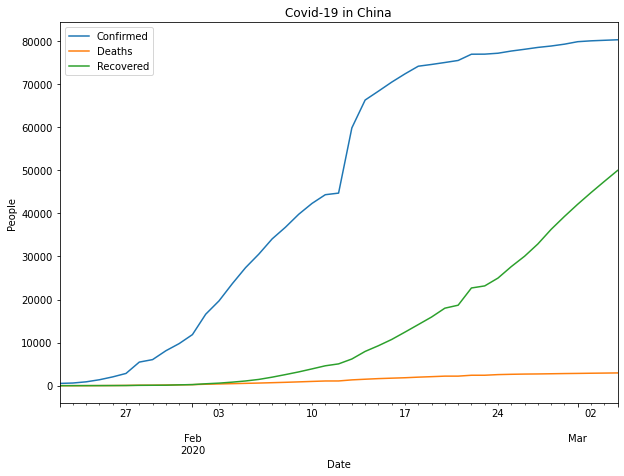

In [ ]:
#Ahora vamos a hacer un gráfico de China
df_china.plot(figsize=(10, 7))
plt.title('Covid-19 in China')
plt.xlabel('Date')
plt.ylabel('People')

Ahora hagamos un resample de China mensual para hacer un gráfico de barras.

In [ ]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

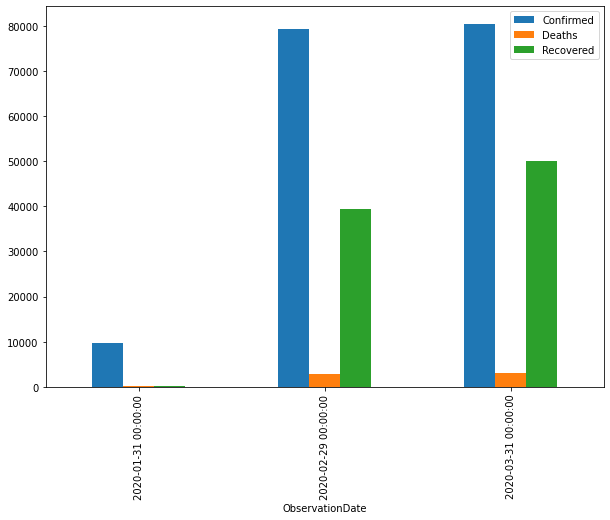

In [ ]:
df_monthly.plot(kind='bar', figsize=(10, 7))

<AxesSubplot:xlabel='ObservationDate'>

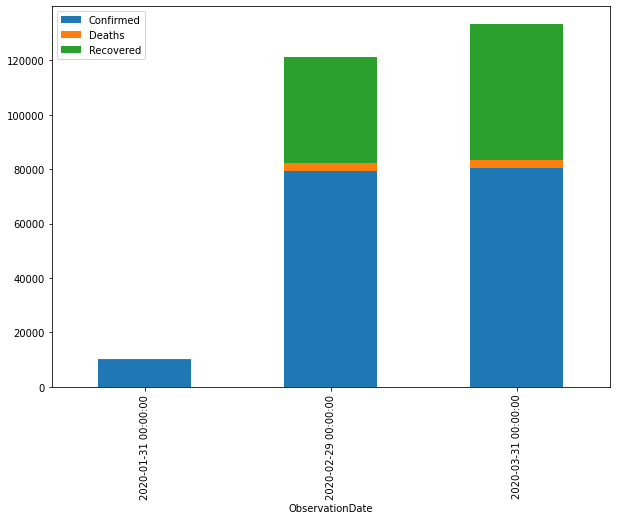

In [ ]:
#Si queremos que las barras se monten, ponemos stacked=True
df_monthly.plot(kind='bar', figsize=(10, 7), stacked=True)

Agreguemos unanueva columna para los que están en tratamiento y así hacer un gráfico _pie_.

In [ ]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


Sabemos que `Deaths + Recovered + Traitment = Confirmed`. Entonces:

array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

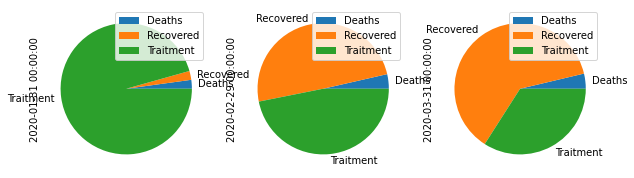

In [ ]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize=(10, 7), kind='pie', subplots=True)

<AxesSubplot:ylabel='Frequency'>

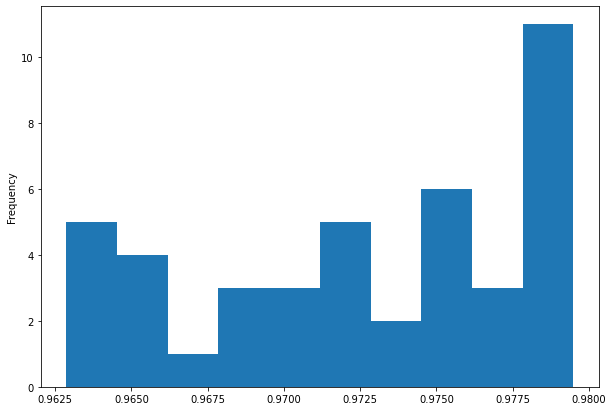

In [ ]:
#Un histograma
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].plot(figsize = (10,7), bins = 10, kind='hist')

#df_china['rate'].hist(figsize = (10,7), bins = 10)  esta línea da lo mismo

Entonces, para escoger un gráfico, básicamente debes modificar el argumento `kind`. Puedes leer la documendación de [Pandas Plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) para que tus gráficos queden como tú desees. Y recuerda que también puedes combinar funcionalidades de Matplotlib.

## Cómo lidiar con datos duplicados en Pandas

Es usual que en una base de datos aparezcan datos repetidos. Pero Pandas tiene funcionalidades para lidiar eficientemente con esto.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'a': ['w'] * 4 + ['x'] * 3 + ['y'] * 2 + ['z']+['v'], 
                   'b': [1, 1, 1, 1, 2, 2, 2, 3, 3, 4,5]})

df

,a,b
0,w,1
1,w,1
2,w,1
3,w,1
4,x,2
5,x,2
6,x,2
7,y,3
8,y,3
9,z,4


Para ver qué datos están duplicados usa `.duplicated()`. Esto marca la primera ocurrencia por defecto.

In [ ]:
df.duplicated()

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Lo anterior da lo mismo que `.duplicated(keep='first')`

In [ ]:
df.duplicated(keep='first')

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Por supuesto, también podemos marcar la última ocurrencia `.duplicated(keep='last')`.

In [ ]:
df.duplicated(keep='last')

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

Para filtrar los no duplicados usamos el operador `~` que significa negación. Fíjate que aquí también puedes especificar la primera o última concurrencia.

In [ ]:
df[~ df.duplicated()]

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


Ahora para marcar todos los registros duplicados agregamos el argumento `.duplicated(keep=False)`. Es decir, se marcan los datos que se repiten al menos una vez. Los que solo aparecen una vez, salen como `False`.

In [ ]:
df.duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
dtype: bool

Para eliminar los datos duplicados usamos `drop_duplicates()` que viene por defecto con `keep='first'`.

In [ ]:
df.drop_duplicates()

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


También es posible eliminar duplicados teniendo en cuenta una sola columna.

In [ ]:
df.drop_duplicates(['a'], keep='last')

,a,b
3,w,1
6,x,2
8,y,3
9,z,4
10,v,5


## Agreggation and groupby

Vamos a aplicar `groupby` a una base de datos. Esta es una de las funciones más interesantes de Pandas. Básicamente agrupas datos por categorías y a estos datos les aplicas funciones o filtros para obtener *insights*.

Para aplicar funciones usas `.apply(la_funcion)` si solo quieres aplicar una función. O puedes susar `.aggregate([funcion1, funcion2])` si quieres poner más de una. `agg()` es el equivalente a `aggregate()`.

Las funciones que agregues pueden ser predefinidas, de las librerías o propias de Python. También puedes usar lambdas.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Veamos las características de nuestro dataset.

In [ ]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Según la tabla anterior parece que el restaurante solo atiende 4 días. Veamos cuáles son estos.

In [ ]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Para tener otra perspectiva de los días convirtámoslos a porcentajes.

In [ ]:
df['day'].value_counts(normalize=True)*100

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

Según esto, los sábados son los días con más clientes (35% de facturaciones). Ahora nos interesa clasificar a los clientes por género (hombre o mujer). 

In [ ]:
df.groupby('sex').median()

,total_bill,tip,size
sex,,,
Male,18.35,3.00,2
Female,16.40,2.75,2


Recuerda que, por lo general, cuando tienes grandes cantidades de datos es mejor aplicar la mediana antes que la media. La mediana trabaja con los valores centrales del dataset. Mientras que la media puede estar demasiado sesgada por valores atípicos (outliers).

Ahora queremos saber cuál es el porcentaje de propina según la factura. Pero como esta columna no existe la vamos a crear.

In [ ]:
df['prct_tip'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


Agrupemos por género, factura total y porcentaje de propina. También veamos sus estadísticas.

In [ ]:
df.groupby('sex')['total_bill', 'prct_tip'].describe()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

       prct_tip                                                              \
          count      mean       std       min       25%       50%       75%   
sex                                                                           
Male      157.0  0.157651  0.064778  0.035638  0.121389  0.153492  0.186240   
Female     87.0  0.166491  0.053632  0.056433  0.140416  0.155581  0.194266   

                  
             max  
sex               
Male    0.710345  
Female  0.416667

Lo anterior nos dice que hay más clientes hombres que mujeres y que los hombres tienden a gastar más que las mujeres en el total de la cuenta. Por otra parte, las mujeres gastan menos, pero dan un porcentaje mayor de propina.

### Aplicando funciones con `apply` y `aggregate`
Recuerda que:
* `apply` es para aplicar una función.
* `aggregate` es para aplicar más de una función.

In [ ]:
#Creemos una función que transforma de euros a dólares.
def mean_eu2usd(x):
    return np.mean(x)*1.12

In [ ]:
#Aplicando una sola función con apply
df.groupby('sex')['total_bill', 'prct_tip'].apply(mean_eu2usd)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,total_bill,prct_tip
sex,,
Male,23.233366,0.176569
Female,20.223724,0.186470


In [ ]:
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].apply(mean_eu2usd)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill  prct_tip
sex    time                        
Male   Lunch    20.214303  0.186013
       Dinner   24.036826  0.174055
Female Lunch    18.299840  0.181759
       Dinner   21.518646  0.189640

In [ ]:
#Ahora aplicando lambdas
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].apply(lambda x: np.mean(x)*1.12)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


total_bill  prct_tip
sex    time                        
Male   Lunch    20.214303  0.186013
       Dinner   24.036826  0.174055
Female Lunch    18.299840  0.181759
       Dinner   21.518646  0.189640

In [ ]:
#Aggrate para más de una función
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].aggregate([np.mean, np.median])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


total_bill         prct_tip          
                    mean median      mean    median
sex    time                                        
Male   Lunch   18.048485  16.58  0.166083  0.156738
       Dinner  21.461452  19.63  0.155407  0.150959
Female Lunch   16.339143  13.42  0.162285  0.153846
       Dinner  19.213077  17.19  0.169322  0.160705

También puedes definir las funciones en diccionarios, donde las llaves son las columnas a las que le vas a aplicar las funciones que son los valores en una lista.

Veamos como aplicar filtros.

In [ ]:
def f_filter(x):
    return mean_eu2usd(x['total_bill'].mean()) > 20

In [ ]:
df.groupby(['sex', 'time']).filter(f_filter)

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Group By: extraer valor con variables categóricas

El objetivo de la ciencia de datos es encontrar valor en los datos. Con Pandas podemos categorizar el dataset para encontrar *insights*.

Al dataset que trabajamos en el bloque anterior le vamos a agregar categorías. Primero creemos una columna llena de 1.

In [ ]:
df['ones'] = 1
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,1


In [ ]:
#Agrupemos y guardemos esto en una variable
df_g = df.groupby(['sex', 'smoker'])['ones'].sum()
df_g

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: ones, dtype: int64

In [ ]:
#Obtengamos los porcentajes
df_g.groupby(level=0).apply(lambda x: x/x.sum() *100)

sex     smoker
Male    Yes       38.216561
        No        61.783439
Female  Yes       37.931034
        No        62.068966
Name: ones, dtype: float64

### Categorizando
Para categorizar usamos `pd.cut(bins=valor)`. `bins` se refiere a los intervalos de categoría de alguna variable.

In [ ]:
pd.cut(df['total_bill'], bins=3).value_counts()

(3.022, 18.983]     140
(18.983, 34.897]     88
(34.897, 50.81]      16
Name: total_bill, dtype: int64

In [ ]:
#Los intervalos se pueden definir en una lista también
pd.cut(df['total_bill'], bins=[3, 18, 35, 60]).value_counts()

(3, 18]     127
(18, 35]    101
(35, 60]     16
Name: total_bill, dtype: int64

In [ ]:
df['bin_total'] = pd.cut(df['total_bill'], bins=[3, 18, 35, 60])
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones,bin_total
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,1,"(3, 18]"
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1,"(3, 18]"
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1,"(18, 35]"
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1,"(18, 35]"
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1,"(18, 35]"
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1,"(18, 35]"
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,1,"(18, 35]"
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,1,"(18, 35]"
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,1,"(3, 18]"


In [ ]:
#Contemos cuántos hay
df.groupby(['time', 'bin_total'])['ones'].count()

time    bin_total
Lunch   (3, 18]      45
        (18, 35]     21
        (35, 60]      2
Dinner  (3, 18]      82
        (18, 35]     80
        (35, 60]     14
Name: ones, dtype: int64

In [ ]:
#Hallemos su porcentaje
df.groupby(['time', 'bin_total'])['ones'].count().groupby(level=0).apply(lambda x: x/x.sum() *100)

time    bin_total
Lunch   (3, 18]      66.176471
        (18, 35]     30.882353
        (35, 60]      2.941176
Dinner  (3, 18]      46.590909
        (18, 35]     45.454545
        (35, 60]      7.954545
Name: ones, dtype: float64

## Tablas dinámicas con Pivot Table

Con la función `.pivot_table()` podemos crear tablas dinámicas de un Data Frame y extraer valor estadístico. Veamos un ejemplo con un dataset de *seaborn*.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.groupby(['sex', 'time'])[['total_bill']].mean()

total_bill
sex    time              
Male   Lunch    18.048485
       Dinner   21.461452
Female Lunch    16.339143
       Dinner   19.213077

In [ ]:
#Reseteando el index
df_group = df.groupby(['sex', 'time'])[['total_bill']].mean().reset_index()
df_group

,sex,time,total_bill
0,Male,Lunch,18.048485
1,Male,Dinner,21.461452
2,Female,Lunch,16.339143
3,Female,Dinner,19.213077


Ahora vamos a hacer la tabla dinámica. En esta nueva tabla, se mantendrán como valores a `total_bill`, el índice será `sex` y las columnas `time`.

In [ ]:
df_group.pivot_table(values='total_bill', index='sex', columns='time')

time,Lunch,Dinner
sex,,
Male,18.048485,21.461452
Female,16.339143,19.213077


Si te estás preguntando cómo funciona `pivot_table`, mira esta imagen:
![Pivot table in Pandas](https://pandas-docs.github.io/pandas-docs-travis/_images/reshaping_pivot.png)

In [ ]:
#También podemos agregar otras funciones solas o como listas
df_pivot = df.pivot_table(values='total_bill', index='sex', columns='time', aggfunc=[np.mean, np.median, np.std])
df_pivot

mean            median              std          
time        Lunch     Dinner  Lunch Dinner     Lunch    Dinner
sex                                                           
Male    18.048485  21.461452  16.58  19.63  7.953435  9.460974
Female  16.339143  19.213077  13.42  17.19  7.500803  8.202085

Ahora, si queremos deshacernos de la tabla dinámica, aplicamos `.unstack()` y/o `.reset_index()` según sea el caso.

In [ ]:
df_pivot.unstack().reset_index()

,level_0,time,sex,0
0,mean,Lunch,Male,18.048485
1,mean,Lunch,Female,16.339143
2,mean,Dinner,Male,21.461452
3,mean,Dinner,Female,19.213077
4,median,Lunch,Male,16.580000
5,median,Lunch,Female,13.420000
6,median,Dinner,Male,19.630000
7,median,Dinner,Female,17.190000
8,std,Lunch,Male,7.953435
9,std,Lunch,Female,7.500803


## Series de tiempo

Las series de tiempo te permiten analizar datos  y extraer valor de datos que tienen formato tipo fecha y hora.

A veces la fecha y hora suele venir en formato string, por eso debes transformar con funciones de Pandas.

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

Eliminemos algunas columnas que no necesitamos.

In [ ]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]

df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


Creemos un nuevo Data Frame que contenga group by por fecha y que los sume para ver la cantidad diaria.

In [ ]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Hagamos algunas operaciones.

In [ ]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time['Deaths'].iloc[12:17]
df2


ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [ ]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Para ver el aumento diario de casos usamos `.diff()`. Lo que esto hace es restar el valor del dato actual con el anterior.

In [ ]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Mira que también podemos aplicar operaciones a `.diff()`.

In [ ]:
df_time[['Confirmed']].diff().max()

Confirmed    15148.0
dtype: float64

In [ ]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Por obvias razones, la primera fila del Data Frame cuando se le aplica `.diff()` contiene `NaN`. Pero no es recomendable (a veces) dejarlo así. Entonces mantengámoslo con los valores iniciales. 

In [ ]:
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0


Guardemos el Data Frame en una variable y luego resolvemos la primera fila con `.fillna()`.

In [ ]:
df_diff = df_time.diff()

df_diff.fillna(df_time.head(1))S

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Supongamos que queremos modificar la muestra cada 7 días o cada fin de semana. Para esto usamos `.resample()` y como argumento pasamos cada qué tiempo queremos agrupar.

Puedes leer la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) para entender los argumentos y la función en general.

In [ ]:
df_diff.resample('M').sum()  #Cada mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9370.0,196.0,194.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [ ]:
df_diff.resample('W').sum()  #Cada semana

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,1563.0,39.0,24.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [ ]:
df_diff.resample('W-Wed').sum()  #Cada miércoles

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,0.0,0.0,0.0
2020-01-29,5610.0,116.0,98.0
2020-02-05,21471.0,431.0,998.0
2020-02-12,17586.0,554.0,4026.0
2020-02-19,30419.0,1004.0,10971.0
2020-02-26,5756.0,648.0,14263.0
2020-03-04,13727.0,484.0,20787.0


## Visualización y graficación de datos

Cuando graficas, los datos se entienden mejor. Es aquí cuando te puedes hacer preguntas y responderlas mediante datos.

Ahora, por ejemplo, queremos saber el país que más ocurrencias tiene. Y vamos a analizar la data de este país. (Spoiler: en este dataset es China, pero puedes analizar los datos actuales).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df_time = df.groupby('ObservationDate').sum()

In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)


Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [ ]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [ ]:
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [ ]:
df_china = df_time.loc['Mainland China', :]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


Text(0, 0.5, 'People')

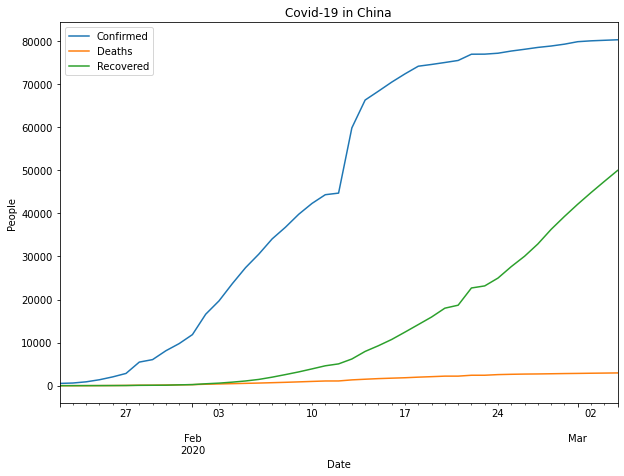

In [ ]:
#Ahora vamos a hacer un gráfico de China
df_china.plot(figsize=(10, 7))
plt.title('Covid-19 in China')
plt.xlabel('Date')
plt.ylabel('People')

Ahora hagamos un resample de China mensual para hacer un gráfico de barras.

In [ ]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

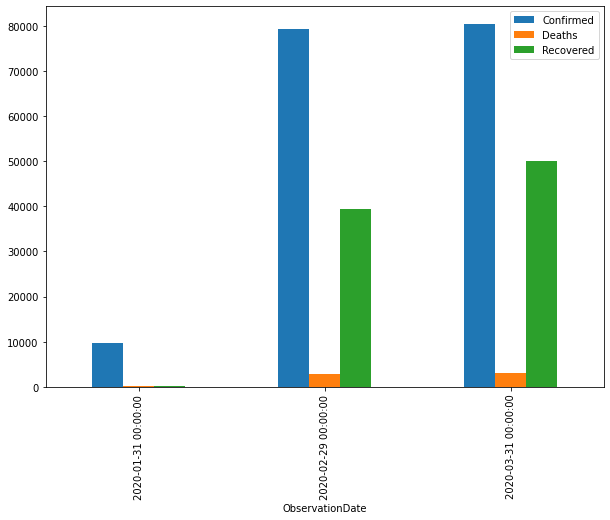

In [ ]:
df_monthly.plot(kind='bar', figsize=(10, 7))

<AxesSubplot:xlabel='ObservationDate'>

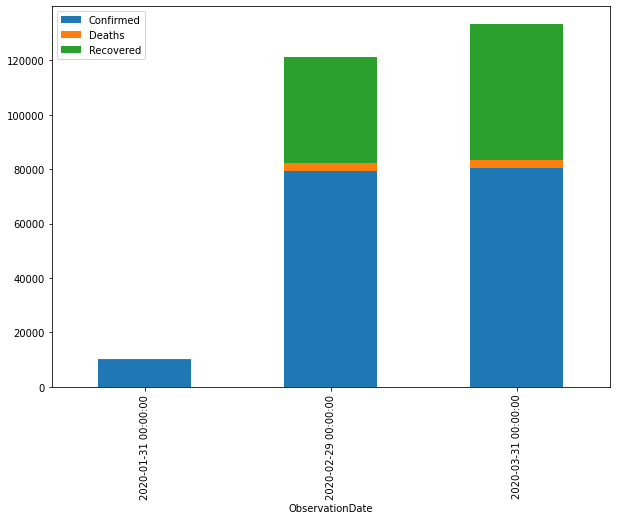

In [ ]:
#Si queremos que las barras se monten, ponemos stacked=True
df_monthly.plot(kind='bar', figsize=(10, 7), stacked=True)

Agreguemos unanueva columna para los que están en tratamiento y así hacer un gráfico _pie_.

In [ ]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


Sabemos que `Deaths + Recovered + Traitment = Confirmed`. Entonces:

array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

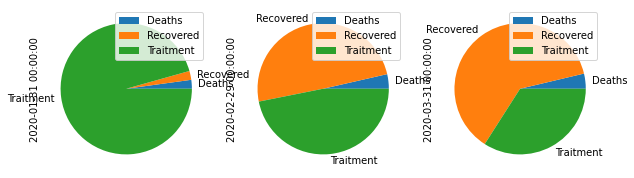

In [ ]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize=(10, 7), kind='pie', subplots=True)

<AxesSubplot:ylabel='Frequency'>

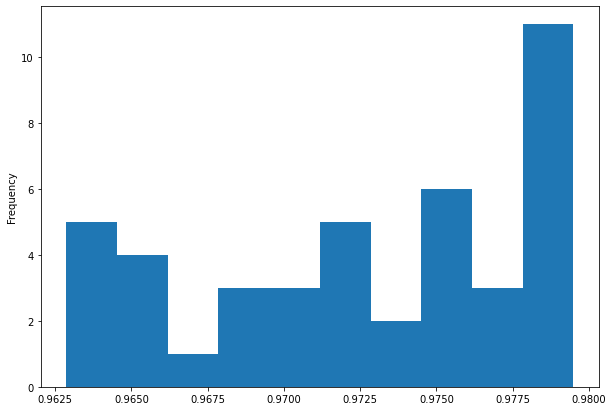

In [ ]:
#Un histograma
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].plot(figsize = (10,7), bins = 10, kind='hist')

#df_china['rate'].hist(figsize = (10,7), bins = 10)  esta línea da lo mismo

Entonces, para escoger un gráfico, básicamente debes modificar el argumento `kind`. Puedes leer la documendación de [Pandas Plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) para que tus gráficos queden como tú desees. Y recuerda que también puedes combinar funcionalidades de Matplotlib.

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

Eliminemos algunas columnas que no necesitamos.

In [ ]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]

df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


Creemos un nuevo Data Frame que contenga group by por fecha y que los sume para ver la cantidad diaria.

In [ ]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Hagamos algunas operaciones.

In [ ]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time['Deaths'].iloc[12:17]
df2


ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [ ]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Para ver el aumento diario de casos usamos `.diff()`. Lo que esto hace es restar el valor del dato actual con el anterior.

In [ ]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Mira que también podemos aplicar operaciones a `.diff()`.

In [ ]:
df_time[['Confirmed']].diff().max()

Confirmed    15148.0
dtype: float64

In [ ]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Por obvias razones, la primera fila del Data Frame cuando se le aplica `.diff()` contiene `NaN`. Pero no es recomendable (a veces) dejarlo así. Entonces mantengámoslo con los valores iniciales. 

In [ ]:
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0


Guardemos el Data Frame en una variable y luego resolvemos la primera fila con `.fillna()`.

In [ ]:
df_diff = df_time.diff()

df_diff.fillna(df_time.head(1))S

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Supongamos que queremos modificar la muestra cada 7 días o cada fin de semana. Para esto usamos `.resample()` y como argumento pasamos cada qué tiempo queremos agrupar.

Puedes leer la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) para entender los argumentos y la función en general.

In [ ]:
df_diff.resample('M').sum()  #Cada mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9370.0,196.0,194.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [ ]:
df_diff.resample('W').sum()  #Cada semana

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,1563.0,39.0,24.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [ ]:
df_diff.resample('W-Wed').sum()  #Cada miércoles

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,0.0,0.0,0.0
2020-01-29,5610.0,116.0,98.0
2020-02-05,21471.0,431.0,998.0
2020-02-12,17586.0,554.0,4026.0
2020-02-19,30419.0,1004.0,10971.0
2020-02-26,5756.0,648.0,14263.0
2020-03-04,13727.0,484.0,20787.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.groupby(['sex', 'time'])[['total_bill']].mean()

total_bill
sex    time              
Male   Lunch    18.048485
       Dinner   21.461452
Female Lunch    16.339143
       Dinner   19.213077

In [ ]:
#Reseteando el index
df_group = df.groupby(['sex', 'time'])[['total_bill']].mean().reset_index()
df_group

,sex,time,total_bill
0,Male,Lunch,18.048485
1,Male,Dinner,21.461452
2,Female,Lunch,16.339143
3,Female,Dinner,19.213077


Ahora vamos a hacer la tabla dinámica. En esta nueva tabla, se mantendrán como valores a `total_bill`, el índice será `sex` y las columnas `time`.

In [ ]:
df_group.pivot_table(values='total_bill', index='sex', columns='time')

time,Lunch,Dinner
sex,,
Male,18.048485,21.461452
Female,16.339143,19.213077


Si te estás preguntando cómo funciona `pivot_table`, mira esta imagen:
![Pivot table in Pandas](https://pandas-docs.github.io/pandas-docs-travis/_images/reshaping_pivot.png)

In [ ]:
#También podemos agregar otras funciones solas o como listas
df_pivot = df.pivot_table(values='total_bill', index='sex', columns='time', aggfunc=[np.mean, np.median, np.std])
df_pivot

mean            median              std          
time        Lunch     Dinner  Lunch Dinner     Lunch    Dinner
sex                                                           
Male    18.048485  21.461452  16.58  19.63  7.953435  9.460974
Female  16.339143  19.213077  13.42  17.19  7.500803  8.202085

Ahora, si queremos deshacernos de la tabla dinámica, aplicamos `.unstack()` y/o `.reset_index()` según sea el caso.

In [ ]:
df_pivot.unstack().reset_index()

,level_0,time,sex,0
0,mean,Lunch,Male,18.048485
1,mean,Lunch,Female,16.339143
2,mean,Dinner,Male,21.461452
3,mean,Dinner,Female,19.213077
4,median,Lunch,Male,16.580000
5,median,Lunch,Female,13.420000
6,median,Dinner,Male,19.630000
7,median,Dinner,Female,17.190000
8,std,Lunch,Male,7.953435
9,std,Lunch,Female,7.500803


In [ ]:
df['ones'] = 1
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,1


In [ ]:
#Agrupemos y guardemos esto en una variable
df_g = df.groupby(['sex', 'smoker'])['ones'].sum()
df_g

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: ones, dtype: int64

In [ ]:
#Obtengamos los porcentajes
df_g.groupby(level=0).apply(lambda x: x/x.sum() *100)

sex     smoker
Male    Yes       38.216561
        No        61.783439
Female  Yes       37.931034
        No        62.068966
Name: ones, dtype: float64

### Categorizando
Para categorizar usamos `pd.cut(bins=valor)`. `bins` se refiere a los intervalos de categoría de alguna variable.

In [ ]:
pd.cut(df['total_bill'], bins=3).value_counts()

(3.022, 18.983]     140
(18.983, 34.897]     88
(34.897, 50.81]      16
Name: total_bill, dtype: int64

In [ ]:
#Los intervalos se pueden definir en una lista también
pd.cut(df['total_bill'], bins=[3, 18, 35, 60]).value_counts()

(3, 18]     127
(18, 35]    101
(35, 60]     16
Name: total_bill, dtype: int64

In [ ]:
df['bin_total'] = pd.cut(df['total_bill'], bins=[3, 18, 35, 60])
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones,bin_total
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,1,"(3, 18]"
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1,"(3, 18]"
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1,"(18, 35]"
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1,"(18, 35]"
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1,"(18, 35]"
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1,"(18, 35]"
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,1,"(18, 35]"
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,1,"(18, 35]"
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,1,"(3, 18]"


In [ ]:
#Contemos cuántos hay
df.groupby(['time', 'bin_total'])['ones'].count()

time    bin_total
Lunch   (3, 18]      45
        (18, 35]     21
        (35, 60]      2
Dinner  (3, 18]      82
        (18, 35]     80
        (35, 60]     14
Name: ones, dtype: int64

In [ ]:
#Hallemos su porcentaje
df.groupby(['time', 'bin_total'])['ones'].count().groupby(level=0).apply(lambda x: x/x.sum() *100)

time    bin_total
Lunch   (3, 18]      66.176471
        (18, 35]     30.882353
        (35, 60]      2.941176
Dinner  (3, 18]      46.590909
        (18, 35]     45.454545
        (35, 60]      7.954545
Name: ones, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Veamos las características de nuestro dataset.

In [ ]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Según la tabla anterior parece que el restaurante solo atiende 4 días. Veamos cuáles son estos.

In [ ]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Para tener otra perspectiva de los días convirtámoslos a porcentajes.

In [ ]:
df['day'].value_counts(normalize=True)*100

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

Según esto, los sábados son los días con más clientes (35% de facturaciones). Ahora nos interesa clasificar a los clientes por género (hombre o mujer). 

In [ ]:
df.groupby('sex').median()

,total_bill,tip,size
sex,,,
Male,18.35,3.00,2
Female,16.40,2.75,2


Recuerda que, por lo general, cuando tienes grandes cantidades de datos es mejor aplicar la mediana antes que la media. La mediana trabaja con los valores centrales del dataset. Mientras que la media puede estar demasiado sesgada por valores atípicos (outliers).

Ahora queremos saber cuál es el porcentaje de propina según la factura. Pero como esta columna no existe la vamos a crear.

In [ ]:
df['prct_tip'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


Agrupemos por género, factura total y porcentaje de propina. También veamos sus estadísticas.

In [ ]:
df.groupby('sex')['total_bill', 'prct_tip'].describe()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

       prct_tip                                                              \
          count      mean       std       min       25%       50%       75%   
sex                                                                           
Male      157.0  0.157651  0.064778  0.035638  0.121389  0.153492  0.186240   
Female     87.0  0.166491  0.053632  0.056433  0.140416  0.155581  0.194266   

                  
             max  
sex               
Male    0.710345  
Female  0.416667

Lo anterior nos dice que hay más clientes hombres que mujeres y que los hombres tienden a gastar más que las mujeres en el total de la cuenta. Por otra parte, las mujeres gastan menos, pero dan un porcentaje mayor de propina.

### Aplicando funciones con `apply` y `aggregate`
Recuerda que:
* `apply` es para aplicar una función.
* `aggregate` es para aplicar más de una función.

In [ ]:
#Creemos una función que transforma de euros a dólares.
def mean_eu2usd(x):
    return np.mean(x)*1.12

In [ ]:
#Aplicando una sola función con apply
df.groupby('sex')['total_bill', 'prct_tip'].apply(mean_eu2usd)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,total_bill,prct_tip
sex,,
Male,23.233366,0.176569
Female,20.223724,0.186470


In [ ]:
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].apply(mean_eu2usd)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill  prct_tip
sex    time                        
Male   Lunch    20.214303  0.186013
       Dinner   24.036826  0.174055
Female Lunch    18.299840  0.181759
       Dinner   21.518646  0.189640

In [ ]:
#Ahora aplicando lambdas
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].apply(lambda x: np.mean(x)*1.12)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


total_bill  prct_tip
sex    time                        
Male   Lunch    20.214303  0.186013
       Dinner   24.036826  0.174055
Female Lunch    18.299840  0.181759
       Dinner   21.518646  0.189640

In [ ]:
#Aggrate para más de una función
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].aggregate([np.mean, np.median])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


total_bill         prct_tip          
                    mean median      mean    median
sex    time                                        
Male   Lunch   18.048485  16.58  0.166083  0.156738
       Dinner  21.461452  19.63  0.155407  0.150959
Female Lunch   16.339143  13.42  0.162285  0.153846
       Dinner  19.213077  17.19  0.169322  0.160705

También puedes definir las funciones en diccionarios, donde las llaves son las columnas a las que le vas a aplicar las funciones que son los valores en una lista.

Veamos como aplicar filtros.

In [ ]:
def f_filter(x):
    return mean_eu2usd(x['total_bill'].mean()) > 20

In [ ]:
df.groupby(['sex', 'time']).filter(f_filter)

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'a': ['w'] * 4 + ['x'] * 3 + ['y'] * 2 + ['z']+['v'], 
                   'b': [1, 1, 1, 1, 2, 2, 2, 3, 3, 4,5]})

df

,a,b
0,w,1
1,w,1
2,w,1
3,w,1
4,x,2
5,x,2
6,x,2
7,y,3
8,y,3
9,z,4


Para ver qué datos están duplicados usa `.duplicated()`. Esto marca la primera ocurrencia por defecto.

In [ ]:
df.duplicated()

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Lo anterior da lo mismo que `.duplicated(keep='first')`

In [ ]:
df.duplicated(keep='first')

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Por supuesto, también podemos marcar la última ocurrencia `.duplicated(keep='last')`.

In [ ]:
df.duplicated(keep='last')

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

Para filtrar los no duplicados usamos el operador `~` que significa negación. Fíjate que aquí también puedes especificar la primera o última concurrencia.

In [ ]:
df[~ df.duplicated()]

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


Ahora para marcar todos los registros duplicados agregamos el argumento `.duplicated(keep=False)`. Es decir, se marcan los datos que se repiten al menos una vez. Los que solo aparecen una vez, salen como `False`.

In [ ]:
df.duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
dtype: bool

Para eliminar los datos duplicados usamos `drop_duplicates()` que viene por defecto con `keep='first'`.

In [ ]:
df.drop_duplicates()

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


También es posible eliminar duplicados teniendo en cuenta una sola columna.

In [ ]:
df.drop_duplicates(['a'], keep='last')

,a,b
3,w,1
6,x,2
8,y,3
9,z,4
10,v,5


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Agrupemos el Data Frame por la columna `cut`.

In [ ]:
df.groupby('cut') 

Hasta aquí solo hemos agrupado. Pero podemos aplicar operaciones a este grupo.

In [ ]:
df.groupby('cut').median() 

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.54,61.8,56.0,1810.0,5.250,5.26,3.23
Premium,0.86,61.4,59.0,3185.0,6.110,6.06,3.72
Very Good,0.71,62.1,58.0,2648.0,5.740,5.77,3.56
Good,0.82,63.4,58.0,3050.5,5.980,5.99,3.70
Fair,1.00,65.0,58.0,3282.0,6.175,6.10,3.97


In [ ]:
df.groupby('cut').count() 

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610


In [ ]:
df.groupby('cut')['carat'].count() 

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: carat, dtype: int64

In [ ]:
df.groupby('cut')['price'].min() 

cut
Ideal        326
Premium      326
Very Good    336
Good         327
Fair         337
Name: price, dtype: int64

Puedes aplicar bucles. Al agrupar un Data Frame tienes una 'llave de grupo' y los diferentes grupos. Por eso usamos `key_group` y `group`. Como `group` tiene varias columnas, debes especificar cual vas a usar. En este caso, usamos `group['price']`.

In [ ]:
for key_group, group in df.groupby('cut'):
    grouped_price = group['price'].mean()

    print(f'Cut: {key_group}; Price: {round(grouped_price, 2)} \n')

Cut: Ideal; Price: 3457.54 

Cut: Premium; Price: 4584.26 

Cut: Very Good; Price: 3981.76 

Cut: Good; Price: 3928.86 

Cut: Fair; Price: 4358.76 



También puedes agrupar con más de un parámetro. Agrupemos por `cut` y `color`. Recuerda que, en este caso, las 'llaves de grupo' viene dadas por estos dos parámetros.

In [ ]:
df.groupby(['cut', 'color'])['price'].mean()   #Esto aún no es un Data Frame

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

Convertimos el objeto anterior a un Data Frame con `.to_frame()`.

In [ ]:
df.groupby(['cut', 'color'])['price'].mean().to_frame()

price
cut       color             
Ideal     D      2629.094566
          E      2597.550090
          F      3374.939362
          G      3720.706388
          H      3889.334831
          I      4451.970377
          J      4918.186384
Premium   D      3631.292576
          E      3538.914420
          F      4324.890176
          G      4500.742134
          H      5216.706780
          I      5946.180672
          J      6294.591584
Very Good D      3470.467284
          E      3214.652083
          F      3778.820240
          G      3872.753806
          H      4535.390351
          I      5255.879568
          J      5103.513274
Good      D      3405.382175
          E      3423.644159
          F      3495.750275
          G      4123.482204
          H      4276.254986
          I      5078.532567
          J      4574.172638
Fair      D      4291.061350
          E      3682.312500
          F      3827.003205
          G      4239.254777
          H      5135.683168
          I      4685.445714
          J      4975.655462

También puedes aplicar otras funciones predefinidas. Incluso puedes crear tus funciones y aplicarlas. Para esto utilizas el método `.aggregate()`.

In [ ]:
df.groupby(['cut', 'color'])['price'].aggregate([min, np.mean, np.median,'max'])

#Puedes hacer referencia a las funciones con strings o directamente con su nombre

min         mean  median    max
cut       color                                 
Ideal     D      367  2629.094566  1576.0  18693
          E      326  2597.550090  1437.0  18729
          F      408  3374.939362  1775.0  18780
          G      361  3720.706388  1857.5  18806
          H      357  3889.334831  2278.0  18760
          I      348  4451.970377  2659.0  18779
          J      340  4918.186384  4096.0  18508
Premium   D      367  3631.292576  2009.0  18575
          E      326  3538.914420  1928.0  18477
          F      342  4324.890176  2841.0  18791
          G      382  4500.742134  2745.0  18741
          H      368  5216.706780  4511.0  18795
          I      334  5946.180672  4640.0  18823
          J      363  6294.591584  5063.0  18710
Very Good D      357  3470.467284  2310.0  18542
          E      352  3214.652083  1989.5  18731
          F      357  3778.820240  2471.0  18777
          G      354  3872.753806  2437.0  18818
          H      337  4535.390351  3734.0  18803
          I      336  5255.879568  3888.0  18500
          J      336  5103.513274  4113.0  18430
Good      D      361  3405.382175  2728.5  18468
          E      327  3423.644159  2420.0  18236
          F      357  3495.750275  2647.0  18686
          G      394  4123.482204  3340.0  18788
          H      368  4276.254986  3468.5  18640
          I      351  5078.532567  3639.5  18707
          J      335  4574.172638  3733.0  18325
Fair      D      536  4291.061350  3730.0  16386
          E      337  3682.312500  2956.0  15584
          F      496  3827.003205  3035.0  17995
          G      369  4239.254777  3057.0  18574
          H      659  5135.683168  3816.0  18565
          I      735  4685.445714  3246.0  18242
          J      416  4975.655462  3302.0  18531

Creemos nuestra propia función y apliquémosla.

In [ ]:
def mean_kilo(x):
    return np.mean(x)/1000

df.groupby(['cut', 'color'])['price'].aggregate([min, np.mean, np.median,'max', mean_kilo]).head(10)

min         mean  median    max  mean_kilo
cut     color                                            
Ideal   D      367  2629.094566  1576.0  18693   2.629095
        E      326  2597.550090  1437.0  18729   2.597550
        F      408  3374.939362  1775.0  18780   3.374939
        G      361  3720.706388  1857.5  18806   3.720706
        H      357  3889.334831  2278.0  18760   3.889335
        I      348  4451.970377  2659.0  18779   4.451970
        J      340  4918.186384  4096.0  18508   4.918186
Premium D      367  3631.292576  2009.0  18575   3.631293
        E      326  3538.914420  1928.0  18477   3.538914
        F      342  4324.890176  2841.0  18791   4.324890

Podemos crear un diccionario de instrucciones para aplicar al `aggregate`. Estas instrucciones tendrían como llave la columna del Data Frame y como valor las funciones para aplicar.

In [ ]:
dict_agg = {
    'carat': [min, max], 
    'price': [np.mean, mean_kilo]
}

In [ ]:
df.groupby(['cut', 'color']).aggregate(dict_agg)

carat              price          
                  min   max         mean mean_kilo
cut       color                                   
Ideal     D      0.20  2.75  2629.094566  2.629095
          E      0.20  2.28  2597.550090  2.597550
          F      0.23  2.45  3374.939362  3.374939
          G      0.23  2.54  3720.706388  3.720706
          H      0.23  3.50  3889.334831  3.889335
          I      0.23  3.22  4451.970377  4.451970
          J      0.23  3.01  4918.186384  4.918186
Premium   D      0.20  2.57  3631.292576  3.631293
          E      0.20  3.05  3538.914420  3.538914
          F      0.20  3.01  4324.890176  4.324890
          G      0.23  3.01  4500.742134  4.500742
          H      0.23  3.24  5216.706780  5.216707
          I      0.23  4.01  5946.180672  5.946181
          J      0.30  4.01  6294.591584  6.294592
Very Good D      0.23  2.58  3470.467284  3.470467
          E      0.20  2.51  3214.652083  3.214652
          F      0.23  2.48  3778.820240  3.778820
          G      0.23  2.52  3872.753806  3.872754
          H      0.23  3.00  4535.390351  4.535390
          I      0.24  4.00  5255.879568  5.255880
          J      0.24  2.74  5103.513274  5.103513
Good      D      0.23  2.04  3405.382175  3.405382
          E      0.23  3.00  3423.644159  3.423644
          F      0.23  2.67  3495.750275  3.495750
          G      0.23  2.80  4123.482204  4.123482
          H      0.25  3.01  4276.254986  4.276255
          I      0.30  3.01  5078.532567  5.078533
          J      0.28  3.00  4574.172638  4.574173
Fair      D      0.25  3.40  4291.061350  4.291061
          E      0.22  2.04  3682.312500  3.682313
          F      0.25  2.58  3827.003205  3.827003
          G      0.23  2.60  4239.254777  4.239255
          H      0.33  4.13  5135.683168  5.135683
          I      0.41  3.02  4685.445714  4.685446
          J      0.30  5.01  4975.655462  4.975655

Podemos aplicar filtros con el método `.filter()`. 

Primero definamos la función que será nuestro filtro.

In [ ]:
def filtro(x):
    return mean_kilo(x['price']) > 4

In [ ]:
df.groupby('cut').filter(filtro)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
